In [2]:
import numpy as np
import pandas as pd

In [72]:
df = pd.read_csv('house-prices.csv')

In [73]:
df.shape

(1000, 2)

In [74]:
df.columns

Index(['area', 'price'], dtype='object')

In [75]:
df.sample(5)

,area,price
929,1162,216131.51
33,2245,169397.15
326,3559,429529.37
461,2315,337280.05
716,2993,306530.75


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    1000 non-null   int64  
 1   price   1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [77]:
df.isnull().sum()

,0
area,0
price,0


In [78]:
df.describe()

,area,price
count,1000.000000,1000.000000
mean,2972.920000,348132.020970
std,1128.465907,142136.964031
min,1002.000000,-19630.310000
25%,2063.500000,249198.307500
50%,2918.500000,348351.020000
75%,3917.750000,449603.300000
max,5000.000000,734120.220000


In [80]:
df.duplicated().value_counts()

,count
False,1000


In [81]:
df.corr()

,area,price
area,1.000000,0.766919
price,0.766919,1.000000


In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

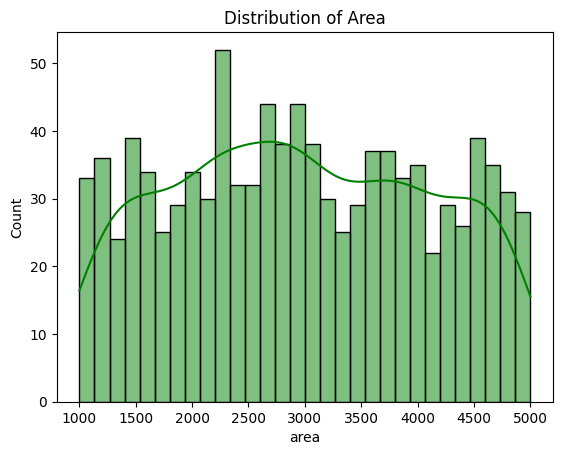

In [89]:
sns.histplot(df['area'], bins=30, kde=True, color="green")
plt.title("Distribution of Area")
plt.show()

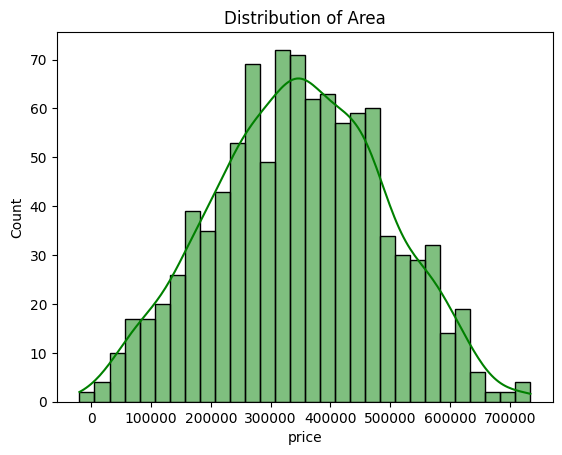

In [90]:
sns.histplot(df['price'], bins=30, kde=True, color="green")
plt.title("Distribution of Area")
plt.show()

<Axes: ylabel='area'>

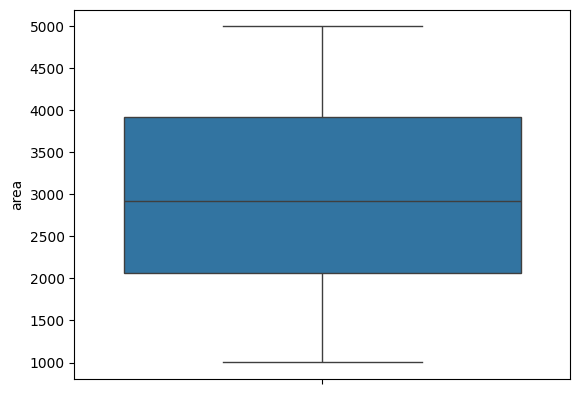

In [91]:
sns.boxplot(df['area'])

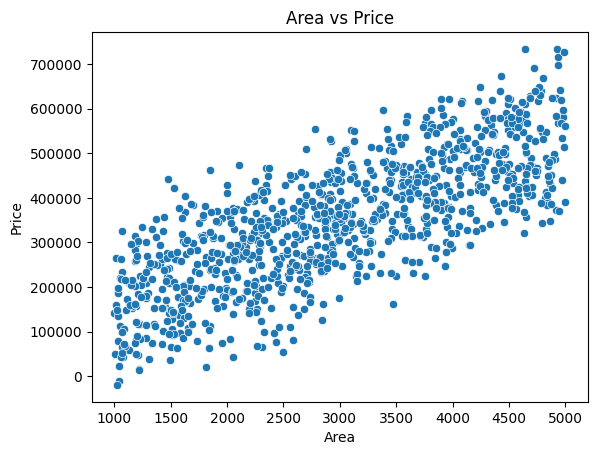

In [93]:
sns.scatterplot(x=df['area'], y=df['price'])
plt.title("Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [94]:
X = df['area']
y = df['price']

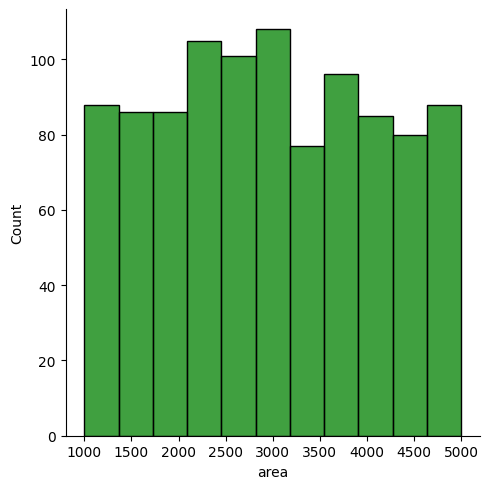

In [98]:
sns.displot(X, color = 'green')

<Axes: xlabel='area', ylabel='Density'>

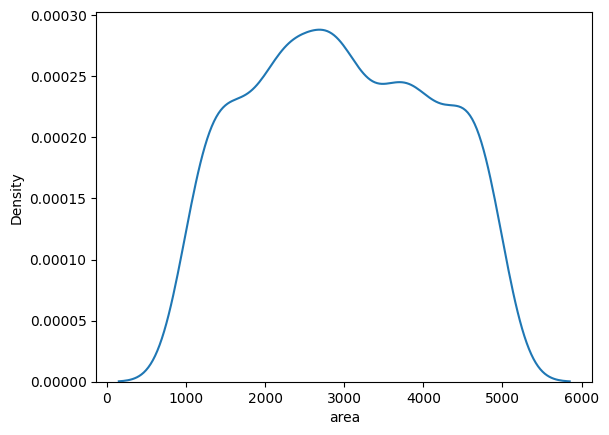

In [99]:
sns.kdeplot(X)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
X_train.shape, X_test.shape

((800,), (200,))

In [120]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [121]:
X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))

X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))

<Axes: ylabel='Density'>

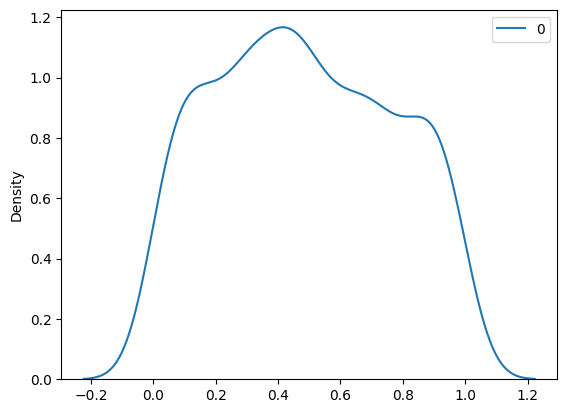

In [122]:
sns.kdeplot(X_train_scaled, color = 'green')

In [123]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['area'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['area'])

In [124]:
X_train_scaled

,area
0,0.338099
1,0.746175
2,0.512917
3,0.315275
4,0.775771
...,...
795,0.733634
796,0.825683
797,0.162027
798,0.472285


In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lr = LinearRegression()

In [115]:
X_test_scaled

array([[ 7.43765046e-01],
       [-1.18875860e+00],
       [ 9.99657833e-01],
       [ 5.07220819e-02],
       [-7.53385460e-01],
       [ 5.92717220e-01],
       [-1.01214260e-01],
       [-5.34810371e-01],
       [-1.66766906e+00],
       [ 1.55409220e+00],
       [ 1.02256046e-01],
       [-1.60458438e+00],
       [ 1.80376537e+00],
       [-5.80124719e-01],
       [-9.10652901e-01],
       [-3.99066134e-02],
       [ 1.68203860e+00],
       [-1.40200259e+00],
       [-9.91507914e-01],
       [ 1.01209707e+00],
       [-3.10214472e-02],
       [ 1.17291857e+00],
       [ 9.18802820e-01],
       [-6.65621120e-02],
       [ 7.29548780e-01],
       [ 6.07822003e-01],
       [ 1.02098223e+00],
       [ 5.24991152e-02],
       [ 9.51479129e-02],
       [ 7.33991363e-01],
       [-2.95799400e-01],
       [ 1.09364179e-01],
       [ 6.16707169e-01],
       [ 1.60384913e+00],
       [ 1.62675176e-01],
       [ 4.70990443e-01],
       [-6.45874949e-01],
       [ 1.43127810e-01],
       [ 3.2

In [127]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [145]:
y_test

,price
521,395448.27
737,157565.03
740,462582.96
660,485216.17
411,275271.61
...,...
408,247085.15
332,395782.78
208,459234.62
613,486763.65


In [151]:
print(lr.predict(X_test_scaled)[0])

424155.165906074


In [152]:
print(lr.predict(X_test_scaled)[0:5])

[424155.16590607 217034.20155642 451580.83842686 349877.30282896
 263695.93605358]
